In [4]:
%load_ext autoreload
%autoreload 2

import pyleoclim.api as pyleo
pyleo.visualization.set_style('journal')
import pandas as pd
import numpy as np
from pyleoclim import examples
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Series

In [5]:
soi_data = examples.load_dataset('soi', skiprows=1)
soi_data['Date'] = pd.to_datetime(soi_data['Date'], format='%Y%m')
nt = len(soi_data)
to = np.linspace(1951, 2020-1/12, nt)
Xo = soi_data['Value'].values

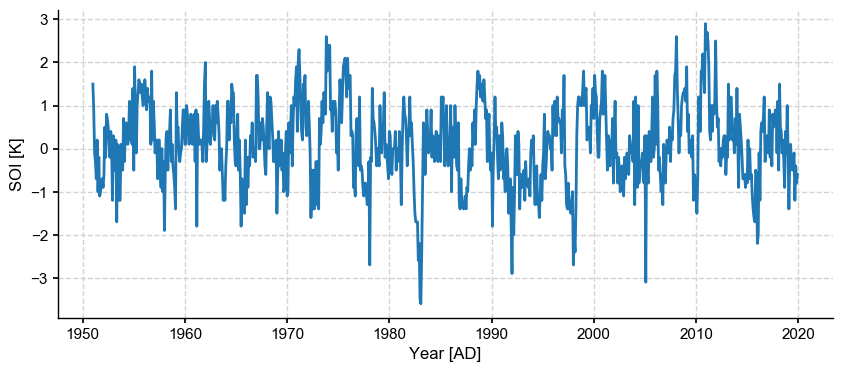

In [6]:
ts = pyleo.Series(time=to, value=Xo, time_name='Year', time_unit='AD', value_name='SOI', value_unit='K')
# print(ts)

fig, ax = ts.plot()

In [7]:
fig, ax = ts.plot(savefig_settings={'path': './figs/soi.pdf'})

# possible usage cases below
# fig, ax = ts.plot(savefig_settings={'path': './figs/soi', 'format': 'png', 'dpi': 300})
# fig, ax = ts.plot(savefig_settings={'path': './figs/soi', 'format': 'eps'})
# fig, ax = ts.plot(savefig_settings={'path': './figs/new/soi', 'format': 'eps'})

Figure saved at: "figs/soi.pdf"


## Spectral analysis on the Series

In [8]:
%%time
psd_wwz = ts.spectral(settings={'nMC': 0})
# print(psd)

CPU times: user 1min 3s, sys: 112 ms, total: 1min 3s
Wall time: 9.35 s


In [9]:
psd_mtm = ts.spectral(method='mtm')

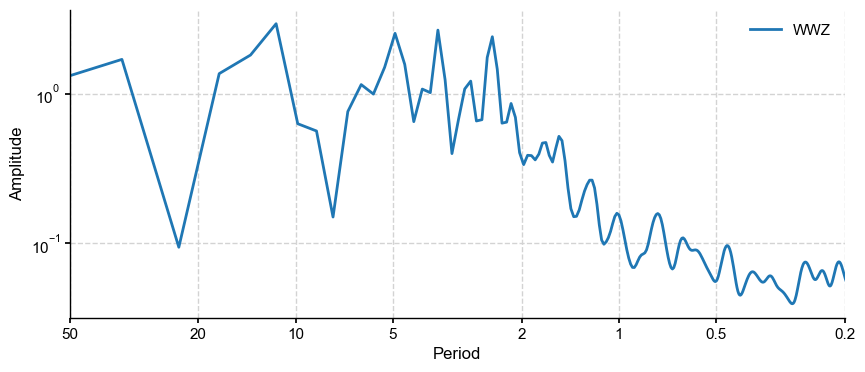

In [10]:
fig, ax = psd_wwz.plot(label='WWZ')

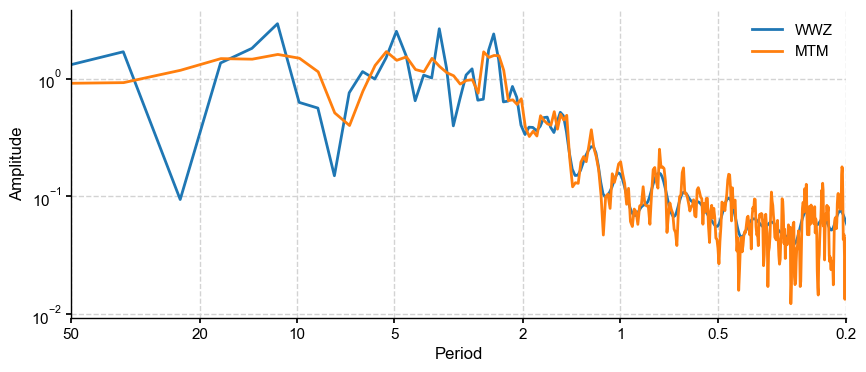

In [11]:
from IPython.display import display
ax = psd_mtm.plot(ax=ax, label='MTM')
display(fig)

## Wavelet analysis on the Series

In [12]:
%%time
scal = ts.wavelet(settings={'nMC': 0})

CPU times: user 3.97 s, sys: 20.2 ms, total: 3.99 s
Wall time: 3.04 s


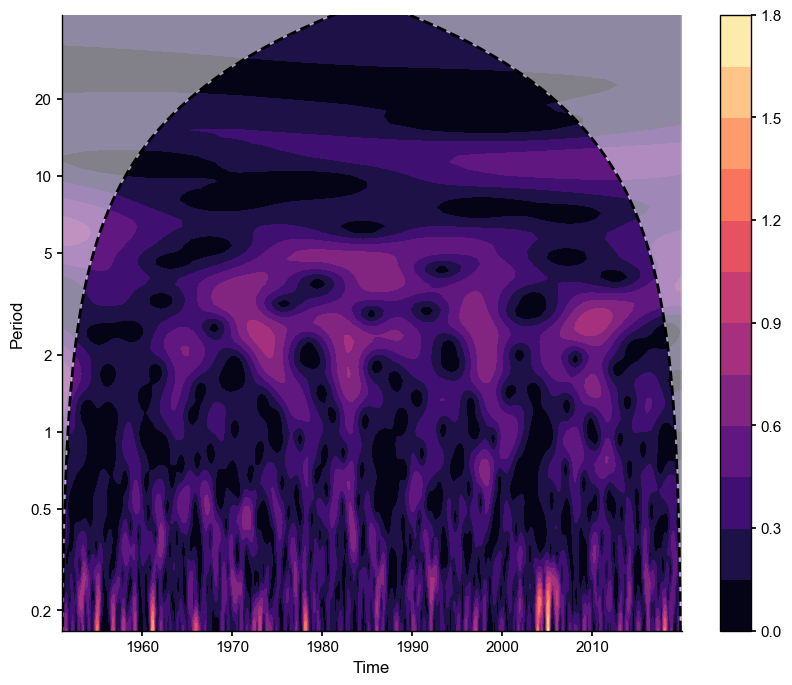

In [13]:
fig, ax = scal.plot()

## Wavelet coherence analysis on two Series objs

In [14]:
import scipy.io as sio
import matplotlib.pyplot as plt

data = sio.loadmat('../example_data/wtc_test_data_nino.mat')
air = data['air'][:, 0]
nino = data['nino'][:, 0]
t = data['datayear'][:, 0]

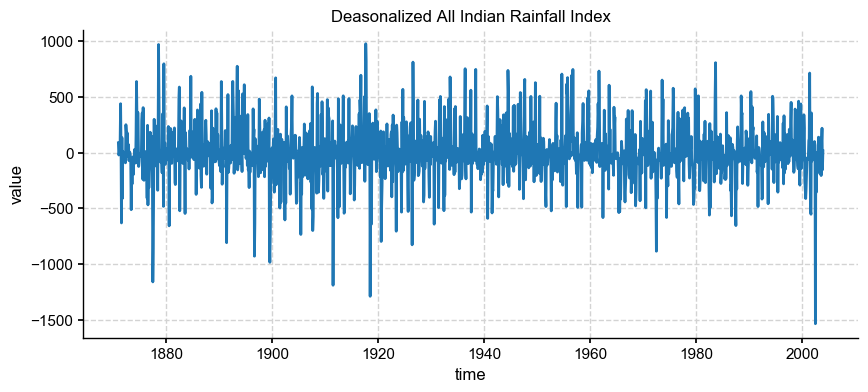

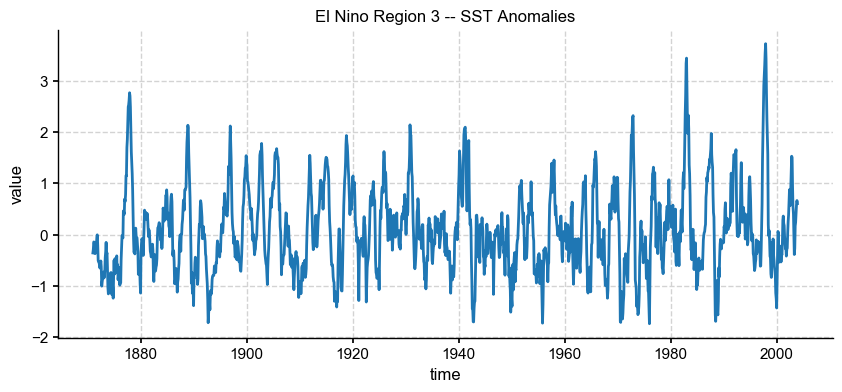

In [15]:
ts_air = pyleo.Series(time=t, value=air)
ts_nino = pyleo.Series(time=t, value=nino)

fig, ax = ts_air.plot(title='Deasonalized All Indian Rainfall Index')
fig, ax = ts_nino.plot(title='El Nino Region 3 -- SST Anomalies')

In [17]:
coh = ts_air.wavelet_coherence(ts_nino, settings={'nMC': 0})

/home/fzhu/Apps/Pyleoclim_util/pyleoclim/analysis.py:1929: UserWarning: The boundaries of tau are not exactly on two of the time axis points,and it will be adjusted to be so.
  warnings.warn("The boundaries of tau are not exactly on two of the time axis points," +


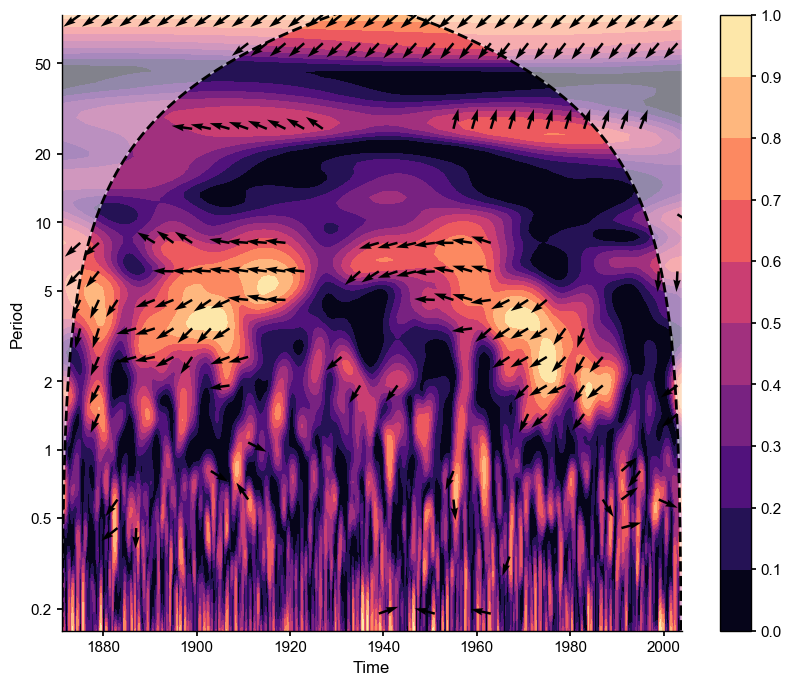

In [22]:
fig, ax = coh.plot(phase_style={'skip_x': 50})

## Correlation analysis

In [23]:
corr_res = ts_air.correlation(ts_nino)
print(corr_res)

{'r': -0.15239413332839044, 'signif': True, 'pvalue': 0.0}


## Causality analysis

In [25]:
causal_res = ts_air.causality(ts_nino)
print(causal_res)

Calculating causality between surrogates: 100%|██████████| 1000/1000 [00:00<00:00, 1774.28it/s]

{'T21': 0.01644548028633629, 'tau21': 0.011968992003857067, 'Z': 1.3740071244960856, 'signif_qs': [0.005, 0.025, 0.05, 0.95, 0.975, 0.995], 'T21_noise': array([-1.05389447e-04, -4.77077201e-05, -2.99128770e-05,  2.99282156e-03,
        4.07498731e-03,  6.54549794e-03]), 'tau21_noise': array([-7.82494797e-05, -3.54480548e-05, -2.21965063e-05,  2.21531604e-03,
        3.01027519e-03,  4.82199557e-03])}
